In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

**Data Cleaning:**

amount of outliers: 7
amount of original values: 500
percentage of outliers: 0.014
length of y left: 493
length of X left: 493
shape of X_derived: (493, 377)


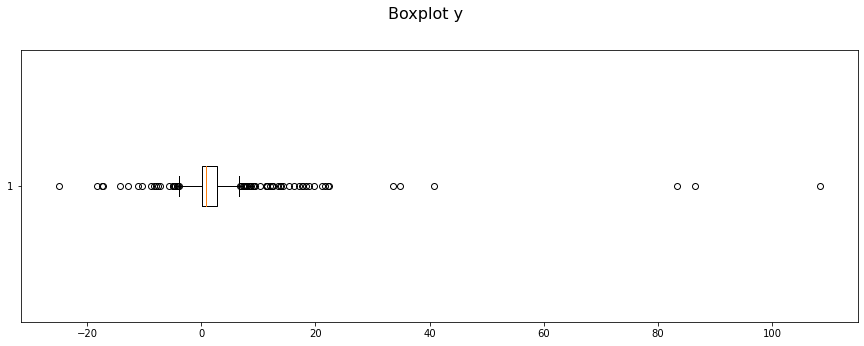

In [4]:
# Loading the training data
training_data = np.genfromtxt("data.csv", delimiter=',')
X = training_data[:,:-1]
y = training_data[:,-1]

# Then we standardize the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# First we want to clean the data, for this we use boxplots
fig1 = plt.figure(figsize=(15,5))
fig1.suptitle('Boxplot y', fontsize=16, y=1.0)
plt.boxplot(y, vert = False)

# We decide to remove the outliers higher (lower) than 30 (-20), as we see in the plot that these lie far from the other values
upper_outliers = y[y > 30]
lower_outliers = y[y < -20]
outliers = np.concatenate((lower_outliers, upper_outliers))
print(f"amount of outliers: {len(outliers)}")
print(f"amount of original values: {len(y)}")
print(f"percentage of outliers: {len(outliers)/ len(y)}")

# Remove the outliers from the dataset
upper_y = y[y < 30]
y_clean = upper_y[upper_y > -20]
print(f"length of y left: {len(y_clean)}")
upper_X = X[y < 30]
X_clean = upper_X[upper_y > -20]
print(f"length of X left: {len(X_clean)}")

# Then we add higher order polynomials of the cleaned features
M = 2
poly = PolynomialFeatures(degree=M, include_bias=False)
X_derived = poly.fit_transform(X_clean) # Creating the derived features
print(f"shape of X_derived: {np.shape(X_derived)}")

**Linear Regression (Base model):**

In [5]:
# Investigate the linear regression model with tenfold cross validation (base model)
lg = LinearRegression()
lg.fit(X_derived, y_clean)

lg_parameters = lg.coef_
lg_intercept = lg.intercept_

lg_RMSE_folds = np.sqrt(-cross_val_score(lg, X_derived, y_clean, cv=10, scoring='neg_mean_squared_error'))
lg_RMSE = np.mean(lg_RMSE_folds)
lg_RMSE_std = np.std(lg_RMSE_folds, ddof=1)/np.sqrt(10)

print("RMSE: {}, with standard error {}".format(lg_RMSE, lg_RMSE_std))
print("Parameters: {} \n".format(lg_parameters))
print("Intercept: {}f \n".format(lg_intercept))

RMSE: 3.1516567155857405, with standard error 0.14539104955058174
Parameters: [ 3.74149194e+12  1.62886166e+11  6.02550846e+12  5.35943182e+11
  2.03763601e+11  1.70665843e+11 -1.89313301e+11  5.92291131e+10
  1.09587647e+12  7.93102657e+12  7.89279653e+11  7.63978099e+12
  4.48955703e+11  7.97014808e+12 -3.49568792e+11  2.80155777e+10
 -3.58079725e+12 -3.80350706e+12  7.82417117e+12 -5.19027498e+11
 -1.72322496e+12 -9.94041655e+11 -7.77361737e+11  4.61331715e+12
 -5.12384973e+11 -1.87348454e+12  1.29961444e+12 -3.60770807e+12
  2.72140908e+12  4.52597800e+12  1.89128180e+12 -3.33036212e+12
 -1.68290940e+12 -1.41347559e+12 -1.01146571e+12 -3.44213295e+12
  2.43319043e+12  4.01011366e+12 -1.03728343e+12 -7.73171937e+12
  4.19325463e+12  5.02589532e+12 -5.94057933e+12 -5.30805887e+12
 -3.15885245e+11 -5.59182533e+12  4.46394993e+12 -6.52362462e+12
 -3.89562999e+12 -2.87196769e+12  7.81646508e+11 -2.46277048e+11
 -1.47556715e+11  8.90244375e+12 -3.60840541e+11  1.87881481e+12
  8.59378738

**Ridge Regression with RidgeCV function:**

In [6]:
# Use the RidgeCV function to find the optimal lambda and find the optimal RMSE with that
model_with_RidgeCV = RidgeCV(cv=10).fit(X_derived, y_clean)

lambda_RidgeCV = model_with_RidgeCV.alpha_

model_RidgeCV = Ridge(alpha = lambda_RidgeCV)
    
cv_folds = KFold(n_splits=10, shuffle=True)
RidgeCV_RMSE_folds = np.sqrt(-cross_val_score(model_RidgeCV, X_derived, y_clean, cv=cv_folds, scoring='neg_mean_squared_error'))
    
RidgeCV_RMSE = np.mean(RidgeCV_RMSE_folds)
RidgeCV_RMSE_std = np.std(RidgeCV_RMSE_folds, ddof=1)/np.sqrt(10)
RidgeCV_intercept = model_with_RidgeCV.intercept_
RidgeCV_parameters = model_with_RidgeCV.coef_

print("Optimal value of lambda: {:.4}".format(lambda_RidgeCV))
print("Optimal RMSE: {:.4}".format(RidgeCV_RMSE))
print("Optimal standard deviation of the RMSE: {:.4}".format(RidgeCV_RMSE_std))
print("Optimal parameter values: {}".format(RidgeCV_parameters))
print("Optimal intercept value: {}".format(RidgeCV_intercept))

Optimal value of lambda: 10.0
Optimal RMSE: 2.538
Optimal standard deviation of the RMSE: 0.2393
Optimal parameter values: [ 1.21614294e-01 -7.87031806e-02 -3.42795464e-01  5.65627760e-02
 -5.77228557e-02 -1.47790928e-02  7.16041946e-02 -3.09741899e-01
  2.75114389e-02 -4.56536460e-01 -1.57804631e-01  1.15372040e+00
  4.51776766e-01 -5.06947469e-02  1.11650181e+00  1.02755004e-01
  1.16546094e-01 -4.15384243e-01 -1.45769813e-01 -4.64251297e-01
  4.56416580e-01  4.51712680e-01  8.44214568e-02 -4.69061593e-01
  5.34212385e-01 -3.22737285e-01 -8.65317623e-03  4.79163967e-02
  5.84778556e-02  4.45962683e-02  3.40590127e-02  2.60694444e-02
 -2.93296675e-02  5.57300665e-02  3.84790374e-02 -2.45127847e-02
 -2.77003019e-02 -8.27016696e-02  1.64076435e-02 -6.44046767e-03
 -3.92990374e-02  9.80332965e-02  2.56882601e-02 -1.76301511e-02
  3.69000000e-02 -7.44938899e-02 -1.28490861e-01 -1.47778731e-02
  9.47508805e-02 -6.75709471e-03 -8.11188990e-02  7.37331787e-03
  1.00072759e-01 -6.81560551e-03

**Ridge Regression with one standard error rule:**

Last lambda (by index) that is part of the plateau: 21
Optimal lambda value (by index): 63 

Optimal value of lambda: 849.8
Optimal RMSE: 2.828
Optimal standard deviation of the RMSE: 0.2228
Optimal parameter values: [-2.37681117e-02  9.76753429e-02 -1.75028417e-01 -4.05188493e-02
 -6.09537536e-02  1.51467202e-01  1.55789710e-02 -3.07905682e-01
 -5.70251589e-02 -1.24512236e-01 -9.04116525e-03  4.08140649e-01
  2.32117095e-01  3.66349984e-02  4.59955617e-01 -4.58687505e-02
  9.41696820e-02 -1.27898224e-01 -7.10570618e-02 -1.62789416e-01
  1.52632134e-02  1.23731629e-01  3.08393124e-01 -1.09061411e-01
  1.86011377e-01 -9.16570045e-02  4.15061721e-02  3.32674399e-02
  2.56231432e-02  1.26181159e-02  7.02566044e-03 -2.81798978e-02
  9.69582981e-03  2.82946820e-02  4.52743554e-02 -1.46491375e-02
  2.79755670e-02 -1.13864971e-02 -6.27292859e-03 -2.23557618e-02
 -9.29347710e-03 -8.29742137e-03  2.02431064e-02  1.86273242e-02
  1.86496799e-02  1.73731635e-02 -5.57456843e-02  2.18594437e-02
  3

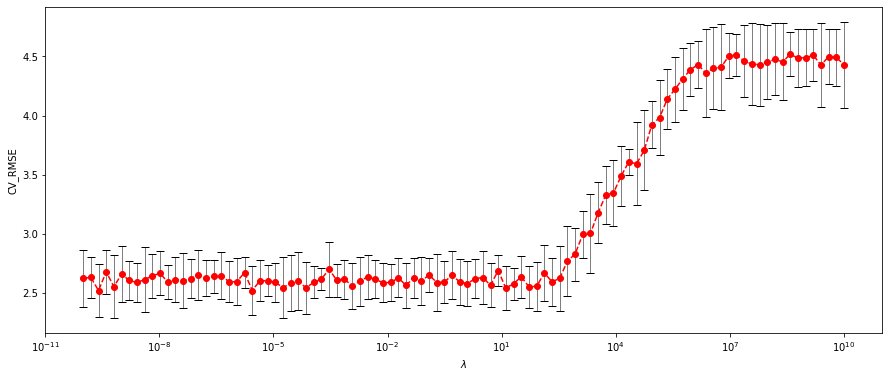

In [7]:
# Investigate the RMSE for Ridge Regression using the one standard error rule
lambs = np.logspace(-10, 10, 100)

ridge_RMSEs = []
ridge_RMSE_stds = []
ridge_parameters = []
ridge_intercepts = []

for lamb in lambs:
    ridge = Ridge(alpha = lamb)

    cv_folds = KFold(n_splits=10, shuffle=True)
    ridge_RMSE_folds = np.sqrt(-cross_val_score(ridge, X_derived, y_clean, cv=cv_folds, scoring='neg_mean_squared_error'))
    
    ridge_RMSEs.append(np.mean(ridge_RMSE_folds))
    ridge_RMSE_stds.append(np.std(ridge_RMSE_folds, ddof=1)/np.sqrt(10)) 
    
    ridge.fit(X_derived, y_clean)
    ridge_parameters.append(list(ridge.coef_))
    ridge_intercepts.append(ridge.intercept_)
    
# Turning lists into NumPy ndarrays
ridge_RMSEs = np.array(ridge_RMSEs)
ridge_RMSE_stds = np.array(ridge_RMSE_stds)
ridge_parameters = np.array(ridge_parameters)
ridge_intercepts = np.array(ridge_intercepts)

# Plotting the results
fig2 = plt.figure(2, figsize=(15,6))
ax1 = fig2.add_subplot()

plt.errorbar(lambs, ridge_RMSEs, yerr=ridge_RMSE_stds, capsize=4, fmt='ro--', ecolor='black', elinewidth=0.5)
ax1.set_xscale("log")
ax1.set_xlabel(r'$\lambda$')
ax1.set_ylabel('CV_RMSE');

# Determining the largest lambda that is part of the plateau.
i = 5
while i <= 100:
    if np.abs((ridge_RMSEs[i] - np.mean(ridge_RMSEs[:i]))) > np.mean(ridge_RMSE_stds[:i])/3:
        print("Last lambda (by index) that is part of the plateau: {}".format(i-1))
        break
    i += 1
    
plateau_mean = np.mean(ridge_RMSEs[:i])
plateau_ave_std = np.mean(ridge_RMSE_stds[:i])

# Determining the optimal lambda according to the one-standard-error rule.
while i <= 100:
    if np.abs((ridge_RMSEs[i] - plateau_mean)) > plateau_ave_std:
        print("Optimal lambda value (by index): {} \n".format(i-1))
        break
    i += 1

lambda_RidgeCV_OSE = lambs[i]
RidgeCV_OSE_RMSE = ridge_RMSEs[i]
RidgeCV_OSE_RMSE_std = ridge_RMSE_stds[i]
ridge_parameters_optimal = ridge_parameters[i]
ridge_intercept_optimal = ridge_intercepts[i]

print("Optimal value of lambda: {:.4}".format(lambda_RidgeCV_OSE))
print("Optimal RMSE: {:.4}".format(RidgeCV_OSE_RMSE))
print("Optimal standard deviation of the RMSE: {:.4}".format(RidgeCV_OSE_RMSE_std))
print("Optimal parameter values: {}".format(ridge_parameters_optimal))
print("Optimal intercept value: {}".format(ridge_intercept_optimal))

**Compare RidgeCV versus Ridge Regression with one standard error rule:**

In [8]:
# Table with results
ridgecv_result = np.array([RidgeCV_RMSE, RidgeCV_RMSE_std, lambda_RidgeCV])
ridgecv_ose_result = np.array([RidgeCV_OSE_RMSE, RidgeCV_OSE_RMSE_std, lambda_RidgeCV_OSE])

indices = ['RMSE', 'Std error', 'Lambda']

df = pd.DataFrame({'RidgeCV' : ridgecv_result, 'Ridge One Std' : ridgecv_ose_result},
                  index=indices,
                  columns=['RidgeCV', 'Ridge One Std'] )

df

,RidgeCV,Ridge One Std
RMSE,2.537984,2.828491
Std error,0.239264,0.222849
Lambda,10.000000,849.753436


We see that the RMSE is lower is we use the RidgeCV function, hence we use this optimal lambda for further analysis

**Ridge Regression with backward feature selection approach:**

In [9]:
# Investigate the RMSE for Ridge Regression using the backward feature selection approach
X_derived_tmp = X_derived
ridge_RMSEs = []
for i in range(len(X_derived_tmp)):
    ridge = Ridge(alpha = lambda_RidgeCV)

    cv_folds = KFold(n_splits=10, shuffle=True)
    ridge_RMSE_folds = np.sqrt(-cross_val_score(ridge, X_derived_tmp, y_clean, cv=cv_folds, scoring='neg_mean_squared_error'))

    ridge_RMSEs.append(np.mean(ridge_RMSE_folds))

    # If a lower RMSE is found delete the feature, otherwise break the for loop
    if ridge_RMSEs[i] < ridge_RMSEs[i - 1] or i == 0:
        ridge.fit(X_derived_tmp, y_clean)
        ridge_coefficients = ridge.coef_
        ridge_intercept = ridge.intercept_
        min_coefficient = min(ridge_coefficients, key=abs)
        index = np.where(ridge_coefficients == min_coefficient)
        X_derived_tmp = np.delete(X_derived_tmp, index[0], axis=1)
    else:
        break

RidgeCV_BS_RMSE = ridge_RMSEs[-1]
RidgeCV_BS_RMSE_std = np.std(RidgeCV_RMSE_folds, ddof=1)/np.sqrt(10)
RidgeCV_BS_intercept = ridge_intercept
RidgeCV_BS_parameters = ridge_coefficients

print("Optimal RMSE: {:.4}".format(RidgeCV_BS_RMSE))
print("Optimal standard deviation of the RMSE: {:.4}".format(RidgeCV_BS_RMSE_std))
print("Optimal parameter values: {}".format(RidgeCV_BS_parameters))
print("Optimal intercept value: {}".format(RidgeCV_BS_intercept))

Optimal RMSE: 2.613
Optimal standard deviation of the RMSE: 0.2393
Optimal parameter values: [ 1.21614294e-01 -7.87031806e-02 -3.42795464e-01  5.65627760e-02
 -5.77228557e-02 -1.47790928e-02  7.16041946e-02 -3.09741899e-01
  2.75114389e-02 -4.56536460e-01 -1.57804631e-01  1.15372040e+00
  4.51776766e-01 -5.06947469e-02  1.11650181e+00  1.02755004e-01
  1.16546094e-01 -4.15384243e-01 -1.45769813e-01 -4.64251297e-01
  4.56416580e-01  4.51712680e-01  8.44214568e-02 -4.69061593e-01
  5.34212385e-01 -3.22737285e-01 -8.65317623e-03  4.79163967e-02
  5.84778556e-02  4.45962683e-02  3.40590127e-02  2.60694444e-02
 -2.93296675e-02  5.57300665e-02  3.84790374e-02 -2.45127847e-02
 -2.77003019e-02 -8.27016696e-02  1.64076435e-02 -6.44046767e-03
 -3.92990374e-02  9.80332965e-02  2.56882601e-02 -1.76301511e-02
  3.69000000e-02 -7.44938899e-02 -1.28490861e-01 -1.47778731e-02
  9.47508805e-02 -6.75709471e-03 -8.11188990e-02  7.37331787e-03
  1.00072759e-01 -6.81560551e-03 -6.03624765e-02  8.91181940e-

**Ridge Regression with forward feature selection approach:**

In [10]:
# Investigate the RMSE for Ridge Regression using the forward feature selection approach
ridge = Ridge(alpha = lambda_RidgeCV)

cv_folds = KFold(n_splits=10, shuffle=True)
ridge_RMSE_folds = np.sqrt(-cross_val_score(ridge, X_derived, y_clean, cv=cv_folds, scoring='neg_mean_squared_error'))

ridge.fit(X_derived, y_clean)
ridge_coefficients = ridge.coef_
max_coefficient = max(ridge_coefficients, key=abs)
index = np.where(ridge_coefficients == max_coefficient)
X_derived_tmp = np.array(X_derived[:, index[0]])

ridge_RMSEs = []
for i in range(len(X_derived_tmp)):
    ridge = Ridge(alpha = lambda_RidgeCV)

    cv_folds = KFold(n_splits=10, shuffle=True)
    ridge_RMSE_folds = np.sqrt(-cross_val_score(ridge, X_derived_tmp, y_clean, cv=cv_folds, scoring='neg_mean_squared_error'))

    ridge_RMSEs.append(np.mean(ridge_RMSE_folds))

    # If a lower RMSE is found delete the feature, otherwise break the for loop
    if ridge_RMSEs[i] < ridge_RMSEs[i - 1] or i == 0:
        ridge.fit(X_derived_tmp, y_clean)
        ridge_coefficients = ridge.coef_
        ridge_intercept = ridge.intercept_
        max_coefficient = max(ridge_coefficients, key=abs)
        index = np.where(ridge_coefficients == max_coefficient)
        X_derived_tmp = np.append(X_derived_tmp, X_derived[:, index[0]], axis=1)
    else:
        break

RidgeCV_FS_RMSE = ridge_RMSEs[-1]
RidgeCV_FS_RMSE_std = np.std(RidgeCV_RMSE_folds, ddof=1)/np.sqrt(10)
RidgeCV_FS_intercept = ridge_intercept
RidgeCV_FS_parameters = ridge_coefficients

print("Optimal RMSE: {:.4}".format(RidgeCV_FS_RMSE))
print("Optimal standard deviation of the RMSE: {:.4}".format(RidgeCV_FS_RMSE_std))
print("Optimal parameter values: {}".format(RidgeCV_FS_parameters))
print("Optimal intercept value: {}".format(RidgeCV_FS_intercept))

Optimal RMSE: 4.19
Optimal standard deviation of the RMSE: 0.2393
Optimal parameter values: [ 1.74493291 -0.37304915 -0.37304915]
Optimal intercept value: 1.6775562761004537


**Lasso Regression with LassoCV function:**

In [11]:
# Use the LassoCV function to find the optimal lambda and find the optimal RMSE with that
model_with_LassoCV = LassoCV(cv=10, tol=0.002).fit(X_derived, y_clean)

lambda_LassoCV = model_with_LassoCV.alpha_

model_LassoCV = Lasso(alpha = lambda_LassoCV)
    
cv_folds = KFold(n_splits=10, shuffle=True)
LassoCV_RMSE_folds = np.sqrt(-cross_val_score(model_LassoCV, X_derived, y_clean, cv=cv_folds, scoring='neg_mean_squared_error'))
    
LassoCV_RMSE = np.mean(LassoCV_RMSE_folds)
LassoCV_RMSE_std = np.std(LassoCV_RMSE_folds, ddof=1)/np.sqrt(10)
LassoCV_intercept = model_with_LassoCV.intercept_
LassoCV_parameters = model_with_LassoCV.coef_

print("Optimal value of lambda: {:.4}".format(lambda_LassoCV))
print("Optimal RMSE: {:.4}".format(LassoCV_RMSE))
print("Optimal standard deviation of the RMSE: {:.4}".format(LassoCV_RMSE_std))
print("Optimal parameter values: {}".format(LassoCV_parameters))
print("Optimal intercept value: {}".format(LassoCV_intercept))

Optimal value of lambda: 0.1073
Optimal RMSE: 2.55
Optimal standard deviation of the RMSE: 0.09621
Optimal parameter values: [-0.         -0.         -0.         -0.          0.          0.
  0.         -0.35369267 -0.         -0.          0.          1.71752997
  0.          0.          1.22402804 -0.         -0.         -0.
 -0.         -0.99064165  0.          0.          0.13004385 -0.
  0.          0.          0.          0.          0.          0.
 -0.         -0.          0.          0.13214543  0.         -0.
  0.          0.          0.         -0.         -0.         -0.
  0.          0.          0.          0.         -0.          0.
  0.         -0.         -0.         -0.          0.          0.
 -0.          0.         -0.          0.          0.          0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.          0.         -0.
  0.          0.          0.         -0.          0.          0.
  0.         -0.      

**Lasso Regression with one standard error rule:**

Last lambda value (by index) that is part of the plateau: 7
Optimal lambda value (by index): 49 

Optimal value of lambda: 0.7925
Optimal RMSE: 2.973
Optimal standard deviation of the RMSE: 0.1848
Optimal parameter values: [-0.         -0.         -0.         -0.         -0.          0.
  0.         -0.4231902  -0.         -0.         -0.          0.54255502
  0.          0.          0.75530379 -0.         -0.         -0.
 -0.         -0.          0.          0.          0.17520794 -0.
  0.         -0.          0.30839639  0.          0.          0.
 -0.         -0.         -0.          0.          0.08311844 -0.
  0.          0.          0.         -0.          0.         -0.
  0.          0.          0.          0.         -0.13315955  0.
  0.         -0.         -0.         -0.          0.          0.
  0.          0.         -0.          0.          0.          0.
 -0.          0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.  

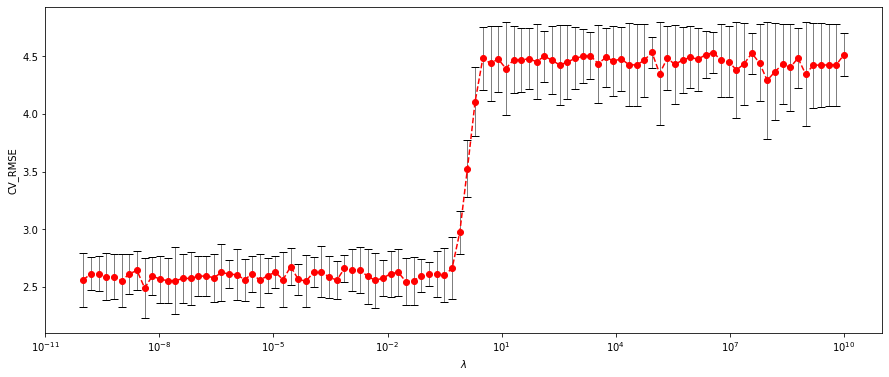

In [12]:
# Investigate the RMSE for Lasso Regression using the one standard error rule
lambs = np.logspace(-10, 10, 100)

lasso_RMSEs = []
lasso_RMSE_stds = []
lasso_parameters = []
lasso_intercepts = []

for lamb in lambs:
    
    lasso = Lasso(alpha = lamb, tol=0.14)
    
    cv_folds = KFold(n_splits=10, shuffle=True)
    lasso_RMSE_folds = np.sqrt(-cross_val_score(lasso, X_derived, y_clean, cv=cv_folds, scoring='neg_mean_squared_error'))
    
    lasso_RMSEs.append(np.mean(lasso_RMSE_folds))
    # Standard deviation of sample mean (standard error):
    lasso_RMSE_stds.append(np.std(lasso_RMSE_folds, ddof=1)/np.sqrt(10))
    
    lasso.fit(X_derived, y_clean)
    lasso_parameters.append(list(lasso.coef_))
    lasso_intercepts.append(lasso.intercept_)
    
lasso_RMSEs = np.array(lasso_RMSEs)
lasso_RMSE_stds = np.array(lasso_RMSE_stds)
lasso_parameters = np.array(lasso_parameters)
lasso_intercepts = np.array(lasso_intercepts)

# Plotting the results
fig3 = plt.figure(3, figsize=(15,6))
ax1 = fig3.add_subplot()

plt.errorbar(lambs, lasso_RMSEs, yerr=lasso_RMSE_stds, capsize=4, fmt='ro--', ecolor='black', elinewidth=0.5)
ax1.set_xscale("log")
ax1.set_xlabel(r'$\lambda$')
ax1.set_ylabel('CV_RMSE');

# Determining the largest lambda that is part of the plateau.
i = 5
while i <= 100:
    if np.abs((lasso_RMSEs[i] - np.mean(lasso_RMSEs[:i]))) > np.mean(lasso_RMSE_stds[:i])/3:
        print("Last lambda value (by index) that is part of the plateau: {}".format(i-1))
        break
    i += 1
    
plateau_mean = np.mean(lasso_RMSEs[:i])
plateau_ave_std = np.mean(lasso_RMSE_stds[:i])

# Determining the optimal lambda according to the one-standard-error rule.
while i <= 100:
    if np.abs((lasso_RMSEs[i] - plateau_mean)) > plateau_ave_std:
        print("Optimal lambda value (by index): {} \n".format(i))
        break
    i += 1

lambda_LassoCV_OSE = lambs[i]
LassoCV_OSE_RMSE = lasso_RMSEs[i]
LassoCV_OSE_RMSE_std = lasso_RMSE_stds[i]
lasso_parameters_optimal = lasso_parameters[i]
lasso_intercept_optimal = lasso_intercepts[i]

print("Optimal value of lambda: {:.4}".format(lambda_LassoCV_OSE))
print("Optimal RMSE: {:.4}".format(LassoCV_OSE_RMSE))
print("Optimal standard deviation of the RMSE: {:.4}".format(LassoCV_OSE_RMSE_std))
print("Optimal parameter values: {}".format(lasso_parameters_optimal))
print("Optimal intercept value: {}".format(lasso_intercept_optimal))

**Compare LassoCV versus Lasso Regression with one standard error rule:**

In [13]:
# Table with results
lassocv_result = np.array([LassoCV_RMSE, LassoCV_RMSE_std, lambda_LassoCV])
lassocv_ose_result = np.array([LassoCV_OSE_RMSE, LassoCV_OSE_RMSE_std, lambda_LassoCV_OSE])

indices = ['RMSE', 'Std error', 'Lambda']

df = pd.DataFrame({'LassoCV' : lassocv_result, 'Lasso One Std' : lassocv_ose_result},
                  index=indices,
                  columns=['LassoCV', 'Lasso One Std'] )

df

,LassoCV,Lasso One Std
RMSE,2.550323,2.972775
Std error,0.096213,0.184804
Lambda,0.107252,0.792483


We see that similar to the Ridge Regression, LassoCV again gives a lower RMSE value, hence we use this value for lambda in the further analysis.

**Lasso Regression with backward feature selection approach:**

In [14]:
# Investigate the RMSE for Ridge Regression using the backward feature selection approach
X_derived_tmp = X_derived
lasso_RMSEs = []
for i in range(len(X_derived_tmp)):
    lasso = Lasso(alpha = lambda_LassoCV, tol=0.0001)

    cv_folds = KFold(n_splits=10, shuffle=True)
    lasso_RMSE_folds = np.sqrt(-cross_val_score(lasso, X_derived_tmp, y_clean, cv=cv_folds, scoring='neg_mean_squared_error'))

    lasso_RMSEs.append(np.mean(lasso_RMSE_folds))

    # If a lower RMSE is found delete the feature, otherwise break the for loop
    if lasso_RMSEs[i] < lasso_RMSEs[i - 1] or i == 0:
        lasso.fit(X_derived_tmp, y_clean)
        lasso_coefficients = lasso.coef_
        lasso_intercept = lasso.intercept_
        min_coefficient = min(lasso_coefficients, key=abs)
        index = np.where(lasso_coefficients == min_coefficient)
        X_derived_tmp = np.delete(X_derived_tmp, index[0], axis=1)
    else:
        break

LassoCV_BS_RMSE = lasso_RMSEs[-1]
LassoCV_BS_RMSE_std = np.std(LassoCV_RMSE_folds, ddof=1)/np.sqrt(10)
LassoCV_BS_intercept = lasso_intercept
LassoCV_BS_parameters = lasso_coefficients

print("Optimal RMSE: {:.4}".format(LassoCV_BS_RMSE))
print("Optimal standard deviation of the RMSE: {:.4}".format(LassoCV_BS_RMSE_std))
print("Optimal parameter values: {}".format(LassoCV_BS_parameters))
print("Optimal intercept value: {}".format(LassoCV_BS_intercept))

Optimal RMSE: 2.486
Optimal standard deviation of the RMSE: 0.09621
Optimal parameter values: [-0.35273428  1.716057    1.22343805 -0.99079992  0.13177514  0.14306083
 -1.34423051 -0.39662071  0.4796924  -0.24328033  0.09100693  0.4693846 ]
Optimal intercept value: -0.9626749309799443


**Lasso Regression with forward feature selection approach:**

In [15]:
# Investigate the RMSE for Ridge Regression using the forward feature selection approach
lasso = Lasso(alpha = lambda_LassoCV)

cv_folds = KFold(n_splits=10, shuffle=True)
lasso_RMSE_folds = np.sqrt(-cross_val_score(lasso, X_derived, y_clean, cv=cv_folds, scoring='neg_mean_squared_error'))

lasso.fit(X_derived, y_clean)
lasso_coefficients = lasso.coef_
max_coefficient = max(lasso_coefficients, key=abs)
index = np.where(lasso_coefficients == max_coefficient)
X_derived_tmp = np.array(X_derived[:, index[0]])

lasso_RMSEs = []
for i in range(len(X_derived_tmp)):
    lasso = Lasso(alpha = lambda_LassoCV, tol=0.0001)

    cv_folds = KFold(n_splits=10, shuffle=True)
    lasso_RMSE_folds = np.sqrt(-cross_val_score(lasso, X_derived_tmp, y_clean, cv=cv_folds, scoring='neg_mean_squared_error'))

    lasso_RMSEs.append(np.mean(lasso_RMSE_folds))

    # If a lower RMSE is found delete the feature, otherwise break the for loop
    if lasso_RMSEs[i] < lasso_RMSEs[i - 1] or i == 0:
        lasso.fit(X_derived_tmp, y_clean)
        lasso_coefficients = lasso.coef_
        lasso_intercept = lasso.intercept_
        max_coefficient = max(lasso_coefficients, key=abs)
        index = np.where(lasso_coefficients == max_coefficient)
        X_derived_tmp = np.append(X_derived_tmp, X_derived[:, index[0]], axis=1)
    else:
        break

LassoCV_FS_RMSE = lasso_RMSEs[-1]
LassoCV_FS_RMSE_std = np.std(LassoCV_RMSE_folds, ddof=1)/np.sqrt(10)
LassoCV_FS_intercept = lasso_intercept
LassoCV_FS_parameters = lasso_coefficients

print("Optimal RMSE: {:.4}".format(LassoCV_FS_RMSE))
print("Optimal standard deviation of the RMSE: {:.4}".format(LassoCV_FS_RMSE_std))
print("Optimal parameter values: {}".format(LassoCV_FS_parameters))
print("Optimal intercept value: {}".format(LassoCV_FS_intercept))

Optimal RMSE: 4.209
Optimal standard deviation of the RMSE: 0.09621
Optimal parameter values: [1.41469516]
Optimal intercept value: 1.6787721865207972


**Principal Component Analysis:**

U:  (493, 377) 	D:  (377,) 	V:  (377, 377)


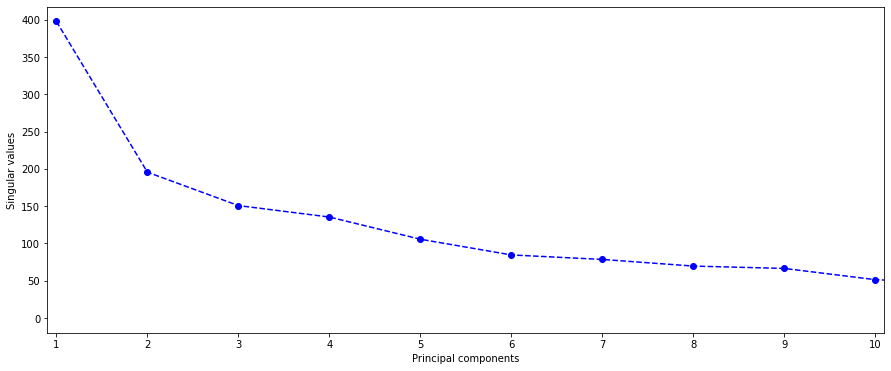

In [16]:
U, D, V_T = np.linalg.svd(X_derived, full_matrices=False)

V = V_T.T

print("U: ",U.shape, "\tD: ", D.shape, "\tV: ",  V.shape)

np.allclose(X_derived, np.dot(U*D, V_T))

fig8 = plt.figure(8, figsize=(15,6))
ax = fig8.add_subplot(1,1,1)

ax.plot(D, 'bo--')
ax.set_xlim(left=-0.1, right=9.1)
ax.set_xticks(range(0,10))
ax.set_xticklabels(range(1,11))
ax.set_xlabel("Principal components")

ax.set_ylabel("Singular values");
Z = U*D

The optimal number of principal components is 15.


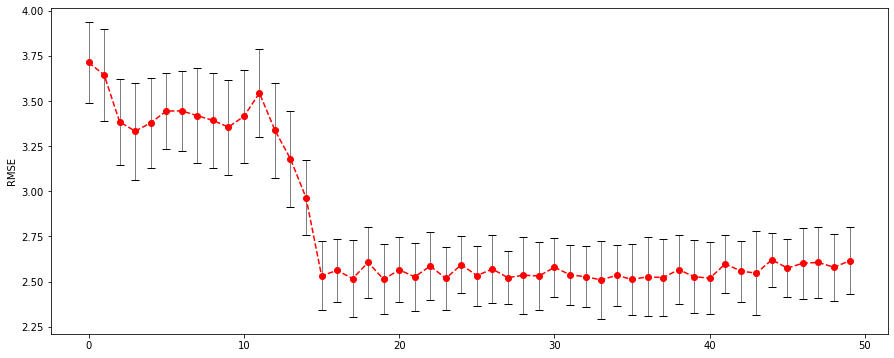

In [17]:
##the singular values are decreasing quite gradually. 
#There does not seem to be a clear distinction between relevant (large) singular values 
#and irrelevant (small) singular values.
K=20
cv_folds = KFold(n_splits=K, shuffle=True)

RMSEs_PCA = []
RMSEs_std_PCA = []

for i in range(50):
    
    input_data = Z[:,0:i+1]
    
    lg = LinearRegression()
    
    neg_MSE_folds_PCA = cross_val_score(lg, input_data, y_clean, cv=cv_folds, scoring='neg_mean_squared_error')
    RMSE_folds_PCA = np.sqrt(-neg_MSE_folds_PCA)
    RMSEs_PCA.append(np.mean(RMSE_folds_PCA))
    RMSEs_std_PCA.append(np.std(RMSE_folds_PCA, ddof=1)/np.sqrt(K))

fig9 = plt.figure(9, figsize=(15,6))
ax = fig9.add_subplot(1,1,1)

ax.errorbar(range(50), RMSEs_PCA, yerr=RMSEs_std_PCA, capsize=4, fmt='ro--', ecolor='black', elinewidth=0.5)
#ax.axhline(y=lg_RMSE, color='b', linestyle='-')
#ax.set_xlim(left=-0.1, right=9.1)
#ax.set_xticks(range(0,10))
#ax.set_xticklabels(range(1,11))
#ax.set_xlabel("Principal components")

ax.set_ylabel("RMSE");

# Determine the optimal number of principal components with the one-standard-error rule
min_index = []
for i in range(0, 40):
    if RMSEs_PCA[i] < min(RMSEs_PCA) + RMSEs_std_PCA[RMSEs_PCA.index(min(RMSEs_PCA))]:
        min_index.append(i)
opt_pca = min_index[0]
print(f"The optimal number of principal components is {min_index[0]}.")

In [18]:
#after including the 15th principal component, there is a clear jump in the RMSE. 
#We conclude that you need the first 15 principal components to obtain a satisfactory model.

print("RMSE estimate of 20-fold CV: {:.4}".format(RMSEs_PCA[opt_pca]))
print("Standard error of RMSE estimate: {:.4}".format(RMSEs_std_PCA[opt_pca]))

RMSE estimate of 20-fold CV: 2.533
Standard error of RMSE estimate: 0.1911


**Summary:**

In [19]:
# Table with results
lg_result = np.array([lg_RMSE, lg_RMSE_std, 'X'])
ridgecv_result = np.array([RidgeCV_RMSE, RidgeCV_RMSE_std, lambda_RidgeCV])
ridgecv_ose_result = np.array([RidgeCV_OSE_RMSE, RidgeCV_OSE_RMSE_std, lambda_RidgeCV_OSE])
ridgecv_bs_result = np.array([RidgeCV_BS_RMSE, RidgeCV_BS_RMSE_std, lambda_RidgeCV])
ridgecv_fs_result = np.array([RidgeCV_FS_RMSE, RidgeCV_FS_RMSE_std, lambda_RidgeCV])
lassocv_result = np.array([LassoCV_RMSE, LassoCV_RMSE_std, lambda_LassoCV])
lassocv_ose_result = np.array([LassoCV_OSE_RMSE, LassoCV_OSE_RMSE_std, lambda_LassoCV_OSE])
lassocv_bs_result = np.array([LassoCV_BS_RMSE, LassoCV_BS_RMSE_std, lambda_LassoCV])
lassocv_fs_result = np.array([LassoCV_FS_RMSE, LassoCV_FS_RMSE_std, lambda_LassoCV])
PCA_result = np.array([RMSEs_PCA[opt_pca], RMSEs_std_PCA[opt_pca],'X'])

indices = ['RMSE', 'Std error', 'Lambda']

df = pd.DataFrame({'Linear Regression' : lg_result, 'RidgeCV' : ridgecv_result, 'Ridge One Std' : ridgecv_ose_result,
                   'Ridge Backward' : ridgecv_bs_result, 'Ridge Forward' : ridgecv_fs_result, 'LassoCV' : lassocv_result,
                   'Lasso One Std' : lassocv_ose_result, 'Lasso Backward' : lassocv_bs_result,
                   'Lasso Forward' : lassocv_fs_result, 'PCA': PCA_result}, 
                 index=indices,
                 columns=['Linear Regression', 'RidgeCV', 'Ridge One Std', 'Ridge Backward', 'Ridge Forward', 'LassoCV',
                          'Lasso One Std', 'Lasso Backward', 'Lasso Forward' , 'PCA'
                         ] )

df

,Linear Regression,RidgeCV,Ridge One Std,Ridge Backward,Ridge Forward,LassoCV,Lasso One Std,Lasso Backward,Lasso Forward,PCA
RMSE,3.1516567155857405,2.537984,2.828491,2.612591,4.190261,2.550323,2.972775,2.485642,4.208657,2.5326237836354837
Std error,0.14539104955058174,0.239264,0.222849,0.239264,0.239264,0.096213,0.184804,0.096213,0.096213,0.19110846167882137
Lambda,X,10.000000,849.753436,10.000000,10.000000,0.107252,0.792483,0.107252,0.107252,X


We see that the lowest RMSE is found using Lasso with backward feature selection. Hence, we use this approach as best model for the Part 1. Note that we added quadratic terms (i.e. M = 2) to the features for all estimates above. If we leave out the quadratic terms (i.e. M = 1), the best model varies (between PCA, Ridge and Lasso) but gives a higher RMSE. Moreover, the differences in RMSE between particular estimators (PCA, Lasso Backward and the Ridge Backward) got quite small at times. This implies that we have chosen for Lasso Backward since it has structually provided the smallest RMSEs but other estimation methods could also perform quite well at times.